## Trabajo final
#### Informacion Diaria - 1 año

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly.offline as py
import plotly.graph_objs as go
from scipy import stats 
from scipy.stats import norm
from numpy import cumsum,  log, polyfit,sqrt,std,subtract
from hurst import compute_Hc, random_walk
from statsmodels.tsa.stattools import adfuller
#from statistics import mean

In [119]:
plt.style.use('seaborn-darkgrid')

Obtenemos el dataset de trabajo leyendo el archivo CSV velas_cryptos

In [120]:

ruta= '../Datos/'
extencion= '.csv'
file= 'velas_cryptos'

In [121]:
def lectura_data(ruta, extencion, archivo):
    data= pd.read_csv(ruta+archivo+extencion, low_memory=False)
    return data

In [122]:
data= lectura_data(ruta, extencion, file)


- Estadistica descriptiva
- Selecionar bitcoin y rango de fechas para analizar

In [123]:
crypto = 'DOTUSD'
fecha_desde = '2010-12-31'
fecha_hasta = '2022-01-01'


In [124]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   timestamp    218 non-null    object 
 1   open         218 non-null    float64
 2   close        218 non-null    float64
 3   min          218 non-null    float64
 4   max          218 non-null    float64
 5   volume       218 non-null    float64
 6   volumeQuote  218 non-null    float64
 7   crypto       218 non-null    object 
dtypes: float64(6), object(2)
memory usage: 13.8+ KB


In [125]:
crypto_mask = np.logical_and(np.logical_and(data.crypto == crypto , data.timestamp > fecha_desde ),
                            data.timestamp < fecha_hasta)

In [126]:
df = data[crypto_mask].copy(deep=True)

In [127]:
df.reset_index()

,index,timestamp,open,close,min,max,volume,volumeQuote,crypto
0,0,2020-08-24T00:00:00.000Z,374.35200,4.74997,4.01261,374.35200,18.42,1.779283e+02,DOTUSD
1,1,2020-08-25T00:00:00.000Z,4.74994,5.68375,4.74994,48.13000,2938.99,1.544473e+04,DOTUSD
2,2,2020-08-26T00:00:00.000Z,5.79590,6.09408,5.34673,6.59351,2375.77,1.465552e+04,DOTUSD
3,3,2020-08-27T00:00:00.000Z,6.22842,5.78400,5.24643,6.88566,3977.13,2.267933e+04,DOTUSD
4,4,2020-08-28T00:00:00.000Z,5.78450,6.15600,5.78410,6.57400,832.41,5.012611e+03,DOTUSD
...,...,...,...,...,...,...,...,...,...
213,213,2021-03-25T00:00:00.000Z,30.29380,29.79318,28.41835,31.20502,42807.28,1.284949e+06,DOTUSD
214,214,2021-03-26T00:00:00.000Z,29.78067,33.12642,29.57514,33.37215,36225.81,1.123662e+06,DOTUSD
215,215,2021-03-27T00:00:00.000Z,33.22109,32.61483,31.16397,33.50000,14209.72,4.621782e+05,DOTUSD
216,216,2021-03-28T00:00:00.000Z,32.59367,32.12221,31.30858,33.21256,11307.46,3.662650e+05,DOTUSD


In [128]:
df['timestampI'] =  pd.to_datetime(df.timestamp).dt.date

In [129]:
df = df.set_index('timestampI')

In [130]:
df['Retorno_Aritmetico'] = df['close'].pct_change()

In [131]:
df

,timestamp,open,close,min,max,volume,volumeQuote,crypto,Retorno_Aritmetico
timestampI,,,,,,,,,
2020-08-24,2020-08-24T00:00:00.000Z,374.35200,4.74997,4.01261,374.35200,18.42,1.779283e+02,DOTUSD,NaN
2020-08-25,2020-08-25T00:00:00.000Z,4.74994,5.68375,4.74994,48.13000,2938.99,1.544473e+04,DOTUSD,0.196587
2020-08-26,2020-08-26T00:00:00.000Z,5.79590,6.09408,5.34673,6.59351,2375.77,1.465552e+04,DOTUSD,0.072194
2020-08-27,2020-08-27T00:00:00.000Z,6.22842,5.78400,5.24643,6.88566,3977.13,2.267933e+04,DOTUSD,-0.050882
2020-08-28,2020-08-28T00:00:00.000Z,5.78450,6.15600,5.78410,6.57400,832.41,5.012611e+03,DOTUSD,0.064315
...,...,...,...,...,...,...,...,...,...
2021-03-25,2021-03-25T00:00:00.000Z,30.29380,29.79318,28.41835,31.20502,42807.28,1.284949e+06,DOTUSD,-0.014886
2021-03-26,2021-03-26T00:00:00.000Z,29.78067,33.12642,29.57514,33.37215,36225.81,1.123662e+06,DOTUSD,0.111879
2021-03-27,2021-03-27T00:00:00.000Z,33.22109,32.61483,31.16397,33.50000,14209.72,4.621782e+05,DOTUSD,-0.015444


In [132]:
df = df.iloc[1:].copy(deep=True)

In [133]:
(mu, sigma) = stats.norm.fit(df.Retorno_Aritmetico)

/Users/maruiz/opt/anaconda3/envs/prueba/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



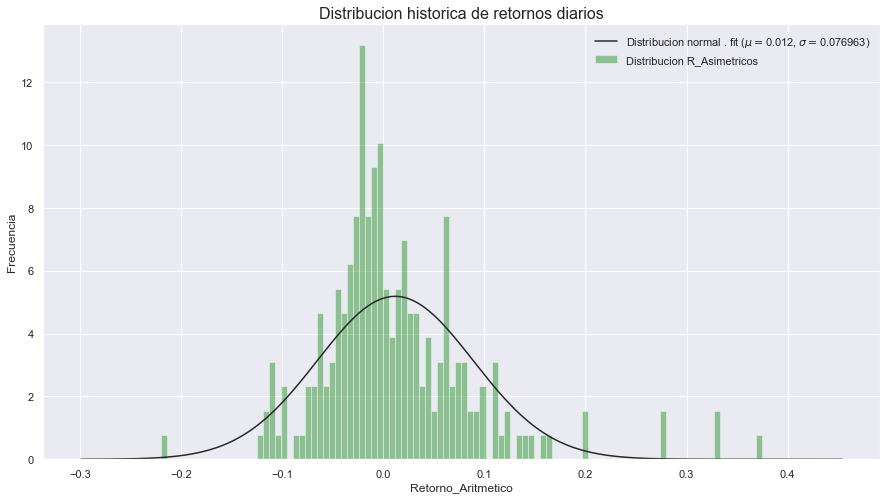

In [134]:
plt.figure(figsize=(15,8))
sns.set(color_codes=True)
ax = sns.distplot(df.Retorno_Aritmetico,
                  bins=100,kde=False,
                  fit=stats.norm,color='green')

plt.title('Distribucion historica de retornos diarios', fontsize=16)
plt.ylabel('Frecuencia')
plt.legend(['Distribucion normal . fit ($\mu=${0:.2g}, $\sigma=${1:2f})'.format(mu, sigma),
            'Distribucion R_Asimetricos'])


In [135]:
df.close.iloc[-1]

34.01628

In [136]:
Años = df.Retorno_Aritmetico.count()/ 365.25
CAGR = (df.close.iloc[-1] / df.close.iloc[0]) ** (1 / Años) -1 
print(50 *'=')
print('> tasa de crecimiento anual compuesto', '%.6s' % (100 * CAGR),'%')
print('> Buy & Hold','%.6s' % (100 *((df.close.iloc[-1] - 
                                     df.close.iloc[0]) /
                                     df.close.iloc[0])),'%')
Maximo_Anterior =  df.close.cummax()
drawdowns = 100 * ((df.close - Maximo_Anterior)/ Maximo_Anterior)
DD = pd.DataFrame({'Close':df.close,
                  'Previous Peak':Maximo_Anterior,
                  'DrawDown':drawdowns})
print('> Máximo drawdown historico','%.6s' % np.min(DD['DrawDown']),'%')
print('> Media Diaria ','%.6s' % (100*df.Retorno_Aritmetico.mean()),'%')
print('> Desviacion tipica diaria ', '%.6s' % (100 * df.Retorno_Aritmetico.std(ddof=1)),'%')
print('> Máximo perdida diario ','%.6s' % (100 * df.Retorno_Aritmetico.min()),'%')
print('> Máximo beneficio diario ','%.6s' % (100 * df.Retorno_Aritmetico.max()),'%')
print('> Dias analizados ','%.6s' % (df.Retorno_Aritmetico.count()),'dias')
print(50*'=')
print('> Coeficiente de Asimetria ','%.6s' % (df.Retorno_Aritmetico.skew()))
print('> Curtosis ','%.6s' % (100 * df.Retorno_Aritmetico.kurt()))
print('> VAR modelo gaussiano NC-95%','%.6s' % (100 * norm.ppf(0.05,mu,sigma)),'%')
print('> VAR modelo gaussiano NC-99%','%.6s' % (100 * norm.ppf(0.01,mu,sigma)),'%')
print('> VAR modelo gaussiano NC-99.7%','%.6s' % (100 * norm.ppf(0.003,mu,sigma)),'%')

print('> VAR modelo Historico NC-95%','%.6s' % (100 * np.percentile(df.Retorno_Aritmetico,5)),'%')
print('> VAR modelo Historico NC-99%','%.6s' % (100 * np.percentile(df.Retorno_Aritmetico,1)),'%')
print('> VAR modelo Historico NC-99.7%','%.6s' % (100 * np.percentile(df.Retorno_Aritmetico,0.3)),'%')


> tasa de crecimiento anual compuesto 1931.9 %
> Buy & Hold 498.48 %
> Máximo drawdown historico -42.05 %
> Media Diaria  1.1873 %
> Desviacion tipica diaria  7.7140 %
> Máximo perdida diario  -22.00 %
> Máximo beneficio diario  37.474 %
> Dias analizados  217 dias
> Coeficiente de Asimetria  1.4857
> Curtosis  493.75
> VAR modelo gaussiano NC-95% -11.47 %
> VAR modelo gaussiano NC-99% -16.71 %
> VAR modelo gaussiano NC-99.7% -19.96 %
> VAR modelo Historico NC-95% -9.699 %
> VAR modelo Historico NC-99% -11.53 %
> VAR modelo Historico NC-99.7% -15.70 %


- Analisis de volatilidad

In [137]:
pd.set_option('mode.chained_assignment', None)

In [138]:
df['volatilidad_14_dias_historica'] = 100 * df.Retorno_Aritmetico.rolling(30).std()

In [139]:
df['volatilidad_14_dias_anualizada'] = df.volatilidad_14_dias_historica * ((365)**0.5)

In [140]:
df['sma_365_volatilidad_anualizada'] = df.volatilidad_14_dias_anualizada.rolling(365).mean()

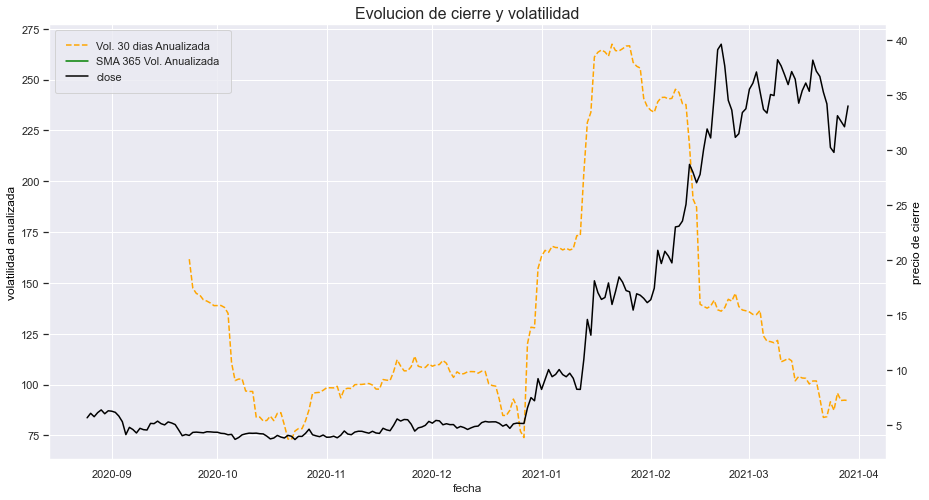

In [141]:
fig, ax1 = plt.subplots(figsize=(15,8))
ax2 = ax1.twinx()
volatilityline = ax1.plot(df.volatilidad_14_dias_anualizada,
                          'orange',linestyle='--',label='Vol. 30 dias Anualizada')
smaline = ax1.plot(df.sma_365_volatilidad_anualizada,
                          'green',linestyle='-',label='SMA 365 Vol. Anualizada')
closeline = ax2.plot(df.close,
                          'black',linestyle='solid',label='close')

plt.title('Evolucion de cierre y volatilidad', fontsize=16)
ax1.set_xlabel('fecha')
ax1.set_ylabel('volatilidad anualizada',color='black')
ax2.set_ylabel('precio de cierre',color = 'black')

plotlines = volatilityline + smaline + closeline

labels = [line.get_label() for line in plotlines]

ax1.legend(plotlines,labels,loc='upper left', frameon=True, borderpad=1)
ax1.grid(True)
ax2.grid(False)
plt.show()

In [142]:
#Volatilidad anualizada
VAM = ((365) ** 0.5) * (100 * df.Retorno_Aritmetico.std())
print('> Volatilidad Anualizada:', '%.6s'  % VAM, '%')
Fecha_Minima_Volatilidad = df.volatilidad_14_dias_anualizada[df.volatilidad_14_dias_anualizada == 
                                                             df.volatilidad_14_dias_anualizada.min()].index.tolist() 
Fecha_Maxima_Volatilidad = df.volatilidad_14_dias_anualizada[df.volatilidad_14_dias_anualizada == 
                                                             df.volatilidad_14_dias_anualizada.max()].index.tolist() 
print('> La mínima volatilidad anualizada fue de:','%.6s' % df.volatilidad_14_dias_anualizada.min() ,'%',
     'registrada el:', Fecha_Minima_Volatilidad[0])
print('> La Máxima volatilidad anualizada fue de:','%.6s' % df.volatilidad_14_dias_anualizada.max() ,'%',
     'registrada el:', Fecha_Maxima_Volatilidad[0])

# promedio sobre el rango porcentual de dias negativos
df['Dias_Negativos'] = np.where(df.Retorno_Aritmetico < 0, 100*(df['max'] - df['min']) / df['min'],0)
dias_negativos = df.loc[df.Dias_Negativos !=0]
DN = dias_negativos.Dias_Negativos.mean()
print('> Rango medio dias negativos','%.4s' % DN,'%')

# promedio sobre el rango porcentual de dias Positivos
df['Dias_Positivos'] = np.where(df.Retorno_Aritmetico > 0, 100*(df['max'] - df['min']) / df['min'],0)
dias_positivos = df.loc[df.Dias_Positivos !=0]
DP = dias_positivos.Dias_Positivos.mean()
print('> Rango medio dias positivos','%.4s' % DP,'%')

print('> Ratio Negativos/Positivos:','%.4s' % (DN/DP), '%')

> Volatilidad Anualizada: 147.37 %
> La mínima volatilidad anualizada fue de: 73.011 % registrada el: 2020-10-22
> La Máxima volatilidad anualizada fue de: 267.36 % registrada el: 2021-01-21
> Rango medio dias negativos 19.5 %
> Rango medio dias positivos 21.4 %
> Ratio Negativos/Positivos: 0.91 %


In [143]:
Fecha_Minima_Volatilidad

[datetime.date(2020, 10, 22)]

- Aplicamos el test de Fuller

In [144]:
adf = adfuller(df.close, autolag='AIC')

In [145]:
print('el T-Test es:',adf[0])

el T-Test es: -0.46007402072075687


In [146]:
print('el P-Value es:',adf[1])

el P-Value es: 0.8995751303336419


In [147]:
print('Valores Criticos:',adf[4])

Valores Criticos: {'1%': -3.4624988216864776, '5%': -2.8756749365852587, '10%': -2.5743041549627677}


- El resultado indica con claridad que la serie NO es estacionaria

- Exponente de Hurst
    - Si > 0.5 autocorrelacionado directo
    - Si = 0.5 Movimiento browniano
    - Si < 0.5 autocorrelacionado inverso.... si esta subiendo, va a bajar

In [163]:
def hurst(ts):
    largo =ts.shape[0]
    lags = range(2,min(20,(largo - 1)))
    tau = [sqrt(std(subtract(ts[lag:].reset_index(),ts[:-lag].reset_index()))) for lag in lags]   
    poly = polyfit(log(lags),log(tau),1)    
    return poly[0]**2.0

In [164]:
print(df.close)
h = hurst(df.close)
print(f'> Hurst Exponent:{h}')

timestampI
2020-08-25     5.68375
2020-08-26     6.09408
2020-08-27     5.78400
2020-08-28     6.15600
2020-08-29     6.40310
                ...   
2021-03-25    29.79318
2021-03-26    33.12642
2021-03-27    32.61483
2021-03-28    32.12221
2021-03-29    34.01628
Name: close, Length: 217, dtype: float64
> Hurst Exponent:[0.05749264]


In [165]:
def plot_hurst(H,c,data):
    f, ax = plt.subplots()
    ax.plot(data[0], c*data[0]**H, color="deepskyblue")
    ax.scatter(data[0], data[1], color="purple")
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel('Time interval')
    ax.set_ylabel('R/S ratio')
    ax.grid(True)
    plt.show()
    print("H={:.4f}, c={:.4f}".format(H,c))

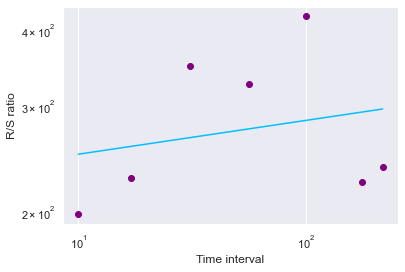

H=0.0560, c=218.8543


In [166]:
H, c, data = compute_Hc(df.close, kind='change', simplified=True)
plot_hurst(H,c,data)

- Analizamos las variaciones del coeficiente de Hurst a lo largo del tiempo en periodos trimestrales


In [168]:
MyHValues = []
hurstDF =pd.DataFrame(columns=['H1'])

Bloque_Datos = 30
Start = 0
Fin = df.shape[0]
End = Bloque_Datos

while Start < Fin:
    hurstDF = df.close[Start:End] 
    MyHValues.append(hurst(hurstDF))
    Start =Start + Bloque_Datos
    End   = End + Bloque_Datos
   

print(f"Media del exponente hurst (H): {(pd.Series(MyHValues).mean())}")


Media del exponente hurst (H): [0.00696657]


[]

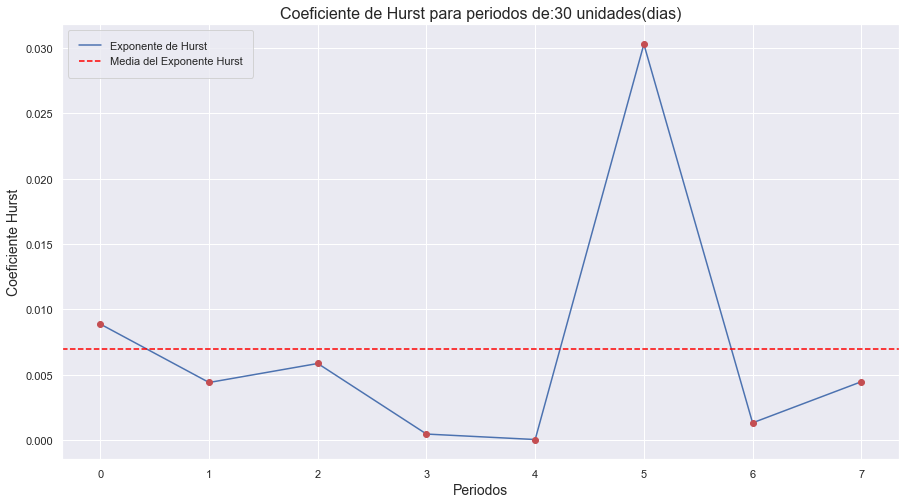

In [169]:
plt.figure(figsize=(15,8))
plt.plot(MyHValues,label='Exponente de Hurst')
plt.plot(MyHValues,'ro')
plt.axhline(pd.Series(MyHValues).mean(),color='red',linestyle='dashed',label='Media del Exponente Hurst')
#plt.axhline(y=0.5,color='black',linestyle='solid',label='Movimiento Browniano')
plt.title('Coeficiente de Hurst para periodos de:'+ str(Bloque_Datos) + ' unidades(dias)', fontsize=16)
plt.ylabel('Coeficiente Hurst', fontsize=14)
plt.xlabel('Periodos',fontsize=14)
plt.legend(loc= 'upper left',frameon=True,borderpad=1)
plt.plot()

- De acuerdo al resultado del analisis del exponente de Hurst, tenemos una tendencia de reversion a la media con autocorrelacion negativa , por lo que en nuestros analisis debemos considerar modelos que tiendan a la reversion a la media